# Churners classification

### libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### dataset

In [14]:
file_url = '/Users/santiagocardenas/Documents/MDSI/202402/Statistical thinking for data science/STDS-at3/dataset_cleaned.csv'
data = pd.read_csv(file_url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41175 entries, 0 to 41174
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41175 non-null  int64  
 1   job             41175 non-null  object 
 2   marital         41175 non-null  object 
 3   education       41175 non-null  object 
 4   default         41175 non-null  object 
 5   housing         41175 non-null  object 
 6   loan            41175 non-null  object 
 7   contact         41175 non-null  object 
 8   month           41175 non-null  object 
 9   day_of_week     41175 non-null  object 
 10  duration        41175 non-null  int64  
 11  campaign        41175 non-null  int64  
 12  pdays           41175 non-null  int64  
 13  previous        41175 non-null  int64  
 14  poutcome        41175 non-null  object 
 15  emp.var.rate    41175 non-null  float64
 16  cons.price.idx  41175 non-null  float64
 17  cons.conf.idx   41175 non-null 

In [15]:
data.columns = data.columns.str.replace('.', '_') 

/var/folders/wv/tct1f2g5605fttplsk9y_gzh0000gn/T/ipykernel_2278/1753127780.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace('.', '_')


### data cleaning

#### duplicated values

In [16]:
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
1262,39,blue-collar,married,basic,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12255,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14228,27,technician,single,professional course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16950,47,technician,divorced,high school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18459,32,technician,single,professional course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20210,55,services,married,high school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20528,41,technician,married,professional course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25210,39,admin,married,university degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28469,24,services,single,high school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32241,49,blue-collar,married,basic,no,yes,no,cellular,may,fri,...,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no


In [17]:
data.drop_duplicates(inplace=True)
data.shape

(41160, 21)

#### missing values

In [18]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

there are no missing values

### initial feature selection

#### categorical columns

In [19]:
churn_dict = {
    'no' : 0,
    'yes' : 1
}
data['y'] = data['y'].map(churn_dict)
data['y'] = data['y'].astype('int')

cat_cols = data.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    data[col] = data[col].astype('category')
data.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp_var_rate       float64
cons_price_idx     float64
cons_conf_idx      float64
euribor3m          float64
nr_employed        float64
y                    int64
dtype: object

In [20]:
data['education'] = data['education'].cat.reorder_categories(
    new_categories = ['unknown', 'illiterate', 'basic', 'high school', 'professional course', 'university degree'],
    ordered = True
)
data.education.unique()

['basic', 'high school', 'professional course', 'unknown', 'university degree', 'illiterate']
Categories (6, object): ['unknown' < 'illiterate' < 'basic' < 'high school' < 'professional course' < 'university degree']

In [21]:
data['month'] = data['month'].cat.reorder_categories(
    new_categories = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
    ordered = True
)
data.month.unique()

['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
Categories (10, object): ['mar' < 'apr' < 'may' < 'jun' ... 'sep' < 'oct' < 'nov' < 'dec']

In [22]:
data['day_of_week'] = data['day_of_week'].cat.reorder_categories(
    new_categories = ['mon', 'tue', 'wed', 'thu', 'fri'],
    ordered = True
)
data.day_of_week.unique()

['mon', 'tue', 'wed', 'thu', 'fri']
Categories (5, object): ['mon' < 'tue' < 'wed' < 'thu' < 'fri']

In [23]:
from scipy.stats import chi2_contingency
def statistical_test_categorical(df, target, column):
    _, p_value, _, _ = chi2_contingency(pd.crosstab(df[target], df[column]))
    return p_value
    
relevant_cat_cols = []
for col in cat_cols:
    p_value = statistical_test_categorical(data, 'y', col)
    if p_value < 0.05:
        relevant_cat_cols.append(col)

print(relevant_cat_cols)
print(cat_cols)

['job', 'marital', 'education', 'default', 'housing', 'contact', 'month', 'day_of_week', 'poutcome']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


only 'loan' does not display influence on churn according to the test

#### numerical cols

In [26]:
num_cols = data.select_dtypes(include='number').columns.tolist()
num_cols.remove('y')

from scipy.stats import mannwhitneyu
def statistical_test_numerical(df, target, column):
    _, p_value = mannwhitneyu(df[df[target] == 0][column], df[df[target] == 1][column])
    return p_value

rel_num_cols = []
for col in num_cols:
    p_value = statistical_test_numerical(data, 'y', col)
    if p_value < 0.01:
        rel_num_cols.append(col)

print(rel_num_cols)
print(num_cols)

['duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']


only 'age' does not display a difference between the categories

#### correlation analysis

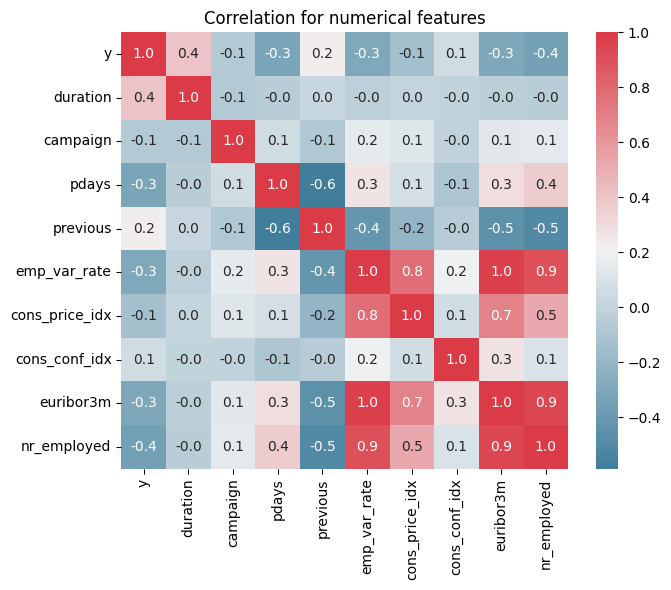

In [27]:
cols_to_plot = ['y'] + rel_num_cols
fig, axis = plt.subplots(1, 1, figsize=(7, 6))
sns.despine(fig)
sns.heatmap(data[cols_to_plot].corr(), cmap = sns.diverging_palette(230, 10, n=1001), ax = axis, annot=True, fmt = '.1f')
axis.set_title('Correlation for numerical features')
plt.tight_layout()

In [81]:
correlations = data[cols_to_plot].corr()
filtered_corr = correlations[abs(correlations) > 0.50]
filtered_corr = filtered_corr.where(~np.eye(filtered_corr.shape[0], dtype=bool))
filtered_corr_pairs = filtered_corr.stack().reset_index()
filtered_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
filtered_corr_pairs.sort_values(by = ['Feature 1', 'Feature 2', 'Correlation'], ascending = True, inplace=True)
filtered_corr_pairs

,Feature 1,Feature 2,Correlation
6,cons_price_idx,emp_var_rate,0.775586
7,cons_price_idx,euribor3m,0.688627
8,cons_price_idx,nr_employed,0.522756
3,emp_var_rate,cons_price_idx,0.775586
4,emp_var_rate,euribor3m,0.972260
5,emp_var_rate,nr_employed,0.907111
10,euribor3m,cons_price_idx,0.688627
9,euribor3m,emp_var_rate,0.972260
11,euribor3m,nr_employed,0.945211
14,nr_employed,cons_price_idx,0.522756
